# Aggregated model

In [1]:
from prayas import *

The experiment consists of multiple variants and in each variant the visitor has one ore more options to choose, but we only observe the overall success. A detailed explanation of the methodology is available in *[Bayesian A/B Testing for Business Decisions](https://arxiv.org/abs/2003.02769)* by Shafi Kamalbasha and Manuel J. A. Eugster (2020).

This data is the same as for the multi-option model -- the experiment consists of two variants with each variant having `9` different options from which the visitor can choose. However, we are going to simulate that we are only observing the aggregated measures. The model is setup as:

In [2]:
m = AggregateModel(variants=["Original", "Progressive"],
                   baseline="Original")

To simulate the aggregated observations, we sum up the measures also used in the multi-option model example:

In [3]:
# Revenue of the 9 options per variant:
rev_a = [27.95,  47.95,  63.95,
         35.95,  63.95,  79.95,
         79.95, 151.95, 223.95]
rev_b = [34.95,  59.95,  79.95,
         37.95,  67.95,  84.95,
         69.95, 132.95, 195.95]

# Conversions of the 9 options per variant:
conv_a = [50, 5, 5, 28, 7, 5, 20, 1, 6]
conv_b = [28, 3, 6, 30, 6, 5, 27, 6, 3]

# Aggregates:
totals_rev_a = np.sum([a*b for a, b in zip(rev_a, conv_a)])
totals_rev_b = np.sum([a*b for a, b in zip(rev_b, conv_b)])

totals_conv_a = np.sum(conv_a)
totals_conv_b = np.sum(conv_b)

Compared to the `one option model` and the `multi-option model`, the measures are also an outcome of the experiment and set together with the result:

In [4]:
m.add_measure("revenue", [totals_rev_a, totals_rev_b])
m.add_measure("gain", [totals_rev_a, totals_rev_b], [-0.06*9, -0.04*9])

m.set_result([totals_conv_a, totals_conv_b], [8067, 8082])

Investigate the result:

<module 'matplotlib.pyplot' from '/Users/manuel.eugster/Library/anaconda3/envs/prayas/lib/python3.7/site-packages/matplotlib/pyplot.py'>

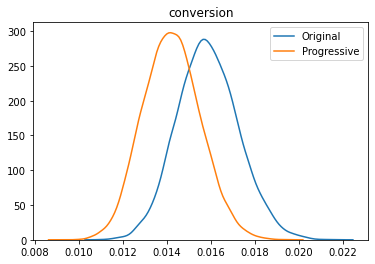

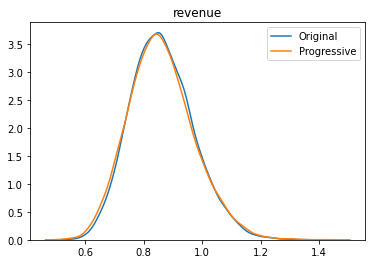

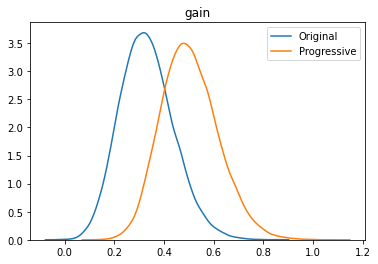

In [5]:
m.plot()

Get details on the result:

In [6]:
m.score_baseline()

,Variant,Measure,ProbabilityToBeBest,ProbabilityToBeatBaseline,UpliftFromBaseline,PotentialLossFromBaseline,MaxUplift,MaxPotentialLoss
0,Progressive,gain,0.87285,0.86410,52.200971,3.163623,53.041724,3.214235
1,Original,conversion,0.80275,0.00000,0.000000,0.000000,11.512601,1.459428
2,Original,revenue,0.50960,0.00000,0.000000,0.000000,0.307025,7.054851
3,Progressive,revenue,0.49040,0.48795,-0.628961,7.373858,-0.306086,7.322250
4,Progressive,conversion,0.19725,0.19750,-10.288254,11.718259,-10.324036,11.664320
5,Original,gain,0.12715,0.00000,0.000000,0.000000,-34.658342,36.531631


The comparison with the multi-options model shows a similar result.